In [2]:
#Add new directory to path to import ngs and pserm
import sys
import os
path = os.getcwd()
path_with_ngs_and_pserm = os.path.dirname(os.path.dirname(path))

sys.path.append(path_with_ngs_and_pserm)

#Imports 
import tqdm
import glob
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from ngs import NGS_round_data, NGS_DMD, common_clones
from pserm import ngs_analysis, generate_clone_set
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import spearmanr, pearsonr

#specify font properties for better export into adobe illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Add myriad pro font
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
aapath = '/Library/Fonts/cour.ttf'

prop = fm.FontProperties(fname=fpath, size = 20)
tickprop = fm.FontProperties(fname = fpath, size = 16)
aaprop = fm.FontProperties(fname = aapath, size = 16)

NGS package imported


# Antibody variant frequency

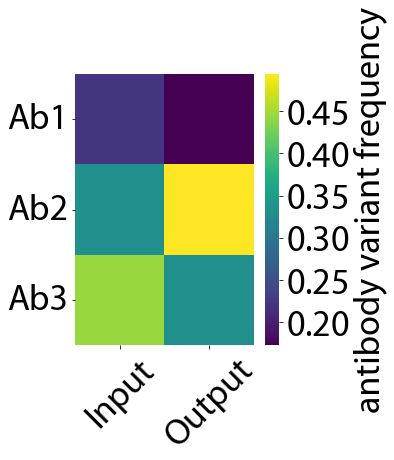

In [39]:
a = np.array([
    [2/9, 1/6],
    [3/9, 3/6],
    [4/9, 2/6]
])
a

fig, ax = plt.subplots(figsize = (4, 5))

sns.heatmap(a, robust = True, ax = ax, cmap = 'viridis', xticklabels = False, rasterized = True)
colorbar = ax.collections[0].colorbar
colorbar.set_label(f'antibody variant frequency', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
colorbar.ax.ticklabel_format(axis = 'y', useMathText = True)

ax.set_yticks([0.5, 1.5, 2.5])
ax.set_yticklabels(['Ab1', 'Ab2', 'Ab3'], fontproperties = tickprop, rotation = 0)

ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Input', 'Output'], fontproperties = tickprop, rotation = 45)

plt.savefig('Frequency Matrix.pdf', bbox_inches = 'tight')

plt.show()

In [6]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_clone_set_trimmed_r1 = generate_clone_set(p1_r1, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed_r2 = generate_clone_set(p1_r2, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed = list(set(p1_clone_set_trimmed_r1).union(set(p1_clone_set_trimmed_r2)))

p1_data = ngs_analysis([p1_r1, p1_r2], ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N'], clone_set = p1_clone_set_trimmed)

p1_data.generate_D()


['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


100%|██████████| 774931/774931 [00:01<00:00, 566643.14it/s]


In [8]:
for pssm in glob.glob('../Project_PSSMs/Project_1/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_1/*.xlsx'):    
    p1_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p1_data.samples:
    if sample != 'Input':
        p1_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)

In [10]:
p1_data.score_all_clones_mp(method = 'PSERM')

Done in 5.52 minutes


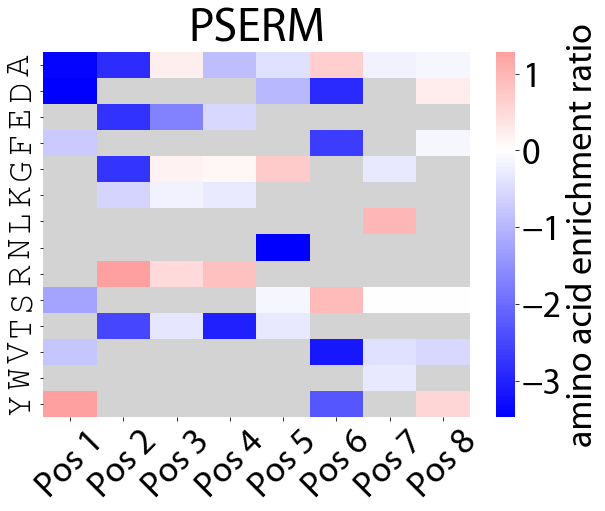

In [30]:
fig, axs = plt.subplots(1, 1, figsize = (7.2*1.2, 6*1.2))

prop = fm.FontProperties(fname=fpath, size = 48)
tickprop = fm.FontProperties(fname = fpath, size = 36)
aaprop = fm.FontProperties(fname = aapath, size = 36)

aas = sorted(p1_data.AA_order)

mask = np.ones_like(p1_data.PSERM['Ag01_P'])
for j in p1_data.library.keys():
    for aa in p1_data.library[j]:
        i = aas.index(aa)
        mask[i, j] = 0

rows_to_drop = []
for i in range(mask.shape[0]):
    if mask[i, :].mean() == 1:
        rows_to_drop.append(aas[i])

PSERM = p1_data.PSERM['Ag01_P'].drop(rows_to_drop, axis = 'index').sort_index()
PSERM2 = p1_data.PSERM['Ova_P'].drop(rows_to_drop, axis = 'index').sort_index()

updated_mask = np.zeros_like(PSERM)
row_ind = 0
for i in range(mask.shape[0]):
    if mask[i, :].mean() != 1:
        updated_mask[row_ind, :] = mask[i, :]
        row_ind += 1

sns.heatmap(PSERM, robust = True, cmap = 'bwr', ax = axs, mask = updated_mask, center = 0)
#sns.heatmap(PSERM2, robust = True, cmap = 'bwr', ax = axs[1], mask = updated_mask, center = 0)

colorbar = axs.collections[0].colorbar
colorbar.set_label(f'amino acid enrichment ratio', fontproperties = tickprop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

xlabels = ['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']
axs.set_xticks([i + 0.5 for i in range(len(xlabels))])
axs.set_xticklabels([f'Pos {i + 1}' for i in range(len(xlabels))], rotation = 45)

#for ax in axs.ravel():
axs.set_facecolor('lightgrey')
for tick in axs.get_yticklabels():
    tick.set_fontproperties(aaprop)
for tick in axs.get_xticklabels():
    tick.set_fontproperties(tickprop)

axs.set_title('PSERM', fontproperties = prop)
#axs[1].set_title('Ovalbumin PSERM') 
plt.tight_layout()
plt.savefig('PSERM.pdf', bbox_inches = 'tight')
plt.show()

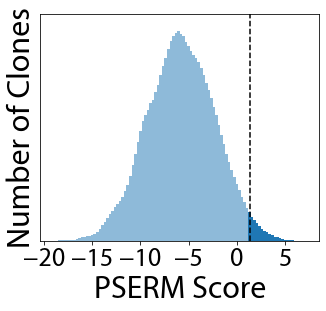

In [29]:
fig, ax = plt.subplots(figsize = (5, 5/1.2))

prop = fm.FontProperties(fname=fpath, size = 32)
tickprop = fm.FontProperties(fname = fpath, size = 26)
aaprop = fm.FontProperties(fname = aapath, size = 26)

top_2_ind = int(0.02 * len(p1_data.scores))
top2_score = p1_data.scores.sort_values('Ag01_P PSERM Score', ascending = False)['Ag01_P PSERM Score'][top_2_ind]

n, bins, p = ax.hist(p1_data.scores['Ag01_P PSERM Score'], bins = 100, alpha = 0.5, edgecolor='None')

#index = np.searchsorted(bins, top5_score)
for i in range(len(p)):
    if bins[i+1] > top2_score:
        p[i].set_fc(plt.get_cmap('tab10')(0))
        p[i].set_alpha(1)

ax.plot([top2_score, top2_score], [0, 40000], '--', color = 'k')
ax.set_xlabel('PSERM Score')

ax.set_ylabel('Number of Clones', fontproperties = prop)
ax.set_xlabel('PSERM Score', fontproperties = prop)

ax.set_yticks([])
ax.set_ylim(0, 40000)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)

#plt.tight_layout()
plt.savefig('Score_clones.pdf', transparent = True, bbox_inches = 'tight')

plt.show()

In [15]:
p1_binding = pd.read_excel('../3_Binding_Correlations_Figure/p1_binding_with_ngs_scores.xlsx', index_col = 0)

ag_overlap = set(p1_binding.index)
excluded_ag_seqs = set(p1_binding[p1_binding['ANT ER'].isna()].index)
excluded_ag_seqs = excluded_ag_seqs.union(set(p1_binding[p1_binding['ANT Frequency'].isna()].index))
excluded_ag_seqs = excluded_ag_seqs.union(set(p1_binding[p1_binding['ANT PSSM Score'].isna()].index))
excluded_ag_seqs = excluded_ag_seqs.union(set(p1_binding[p1_binding['ANT PSERM Score'].isna()].index))

ag_overlap = list(ag_overlap - excluded_ag_seqs)

ova_overlap = set(p1_binding.index)
excluded_ova_seqs = set(p1_binding[p1_binding['OVA ER'].isna()].index)
excluded_ova_seqs = excluded_ova_seqs.union(set(p1_binding[p1_binding['OVA Frequency'].isna()].index))
excluded_ova_seqs = excluded_ova_seqs.union(set(p1_binding[p1_binding['OVA PSSM Score'].isna()].index))
excluded_ova_seqs = excluded_ova_seqs.union(set(p1_binding[p1_binding['OVA PSERM Score'].isna()].index))

ova_overlap = list(ova_overlap - excluded_ova_seqs)

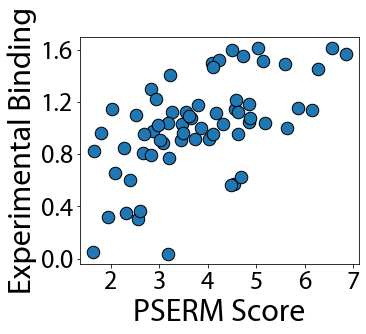

In [28]:
fig, ax = plt.subplots(figsize = (5, 5/1.2))
df = p1_binding[p1_binding['ANT PSERM Score'] > top2_score]
ax.plot(df['ANT PSERM Score'], df['ANT Binding'], '.', markersize = 25, markeredgecolor = 'k')

ax.set_xlabel('PSERM Score', fontproperties = prop)
ax.set_ylabel('Experimental Binding', fontproperties = prop)

ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(tickprop)

plt.savefig('Test.pdf', transparent = True, bbox_inches = 'tight')
plt.show()